In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from copy import deepcopy
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('second_preprocess.csv')

data

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,category
0,-10.551517,-0.762789,-0.160792,7.201996,2.393227,2.654544,6.030200,1.441220,8.255738,-1.908265,...,-0.718024,-1.507005,-0.134653,0.081577,-0.518107,0.248059,-1.234621,0.804927,2.152613,인문/사회
1,-8.657663,-1.747989,1.240416,6.341091,-2.442751,3.103964,3.576728,-2.316809,4.974391,-1.695308,...,-0.422934,-2.202695,0.232058,-0.796056,0.229434,0.388235,-0.606766,0.350321,1.204953,인문/사회
2,-4.485754,-2.786312,-0.961343,9.138304,-3.725683,3.920298,-3.522280,1.608586,6.323410,-1.267140,...,-1.569827,1.624124,4.441761,-0.743415,-1.454284,-0.290925,0.899456,-0.336895,-0.256461,인문/사회
3,-5.706591,-1.581082,-3.901403,8.444764,0.884110,1.012693,-1.870375,3.692609,4.373980,-1.916260,...,1.692728,4.194564,1.885287,-0.531814,-2.069133,0.434823,-0.386848,0.773655,-1.944326,인문/사회
4,-2.114214,-1.476669,5.808393,10.699862,5.400627,4.259531,4.669381,2.216633,6.183870,-2.881552,...,-0.946981,-0.496896,2.135680,0.741738,-2.455003,0.093950,0.618799,0.457912,1.144505,교육
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27112,9.792565,-3.351491,6.869936,0.304746,3.303158,-0.960769,-2.588494,4.522178,1.489480,7.108863,...,1.081842,0.371189,0.721289,-1.155201,0.897518,0.660205,0.923022,-0.216323,0.580020,공학
27113,4.715869,-4.266425,0.707220,-6.709475,1.166910,-0.377677,-6.187236,1.759525,6.464411,-0.776125,...,-0.836179,1.332489,0.509388,-1.053253,-0.001382,-0.220507,-0.889474,-0.382076,-0.124616,공학
27114,-0.030062,-5.204030,1.515123,-13.278943,3.867889,-2.989587,-0.760812,1.778827,4.785962,0.246580,...,-2.097805,0.678070,2.180882,-2.196235,-0.013791,-0.007041,0.144508,0.046608,-1.430938,공학
27115,-0.031056,-2.405836,0.565072,-9.701786,11.256224,-3.153981,2.138429,5.574642,5.876943,0.915326,...,-2.468556,0.322701,0.578440,-1.040924,-1.260381,2.271997,-0.577835,-3.331146,-1.035971,공학


In [14]:
cateList = ['인문/사회', '교육', '공학', '자연', '의약', '예체능']
for num, cate in enumerate(cateList):
    data.loc[ data['category']==cate, 'category' ] = float(num)
    
data

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,category
0,-10.551517,-0.762789,-0.160792,7.201996,2.393227,2.654544,6.030200,1.441220,8.255738,-1.908265,...,-0.718024,-1.507005,-0.134653,0.081577,-0.518107,0.248059,-1.234621,0.804927,2.152613,0.0
1,-8.657663,-1.747989,1.240416,6.341091,-2.442751,3.103964,3.576728,-2.316809,4.974391,-1.695308,...,-0.422934,-2.202695,0.232058,-0.796056,0.229434,0.388235,-0.606766,0.350321,1.204953,0.0
2,-4.485754,-2.786312,-0.961343,9.138304,-3.725683,3.920298,-3.522280,1.608586,6.323410,-1.267140,...,-1.569827,1.624124,4.441761,-0.743415,-1.454284,-0.290925,0.899456,-0.336895,-0.256461,0.0
3,-5.706591,-1.581082,-3.901403,8.444764,0.884110,1.012693,-1.870375,3.692609,4.373980,-1.916260,...,1.692728,4.194564,1.885287,-0.531814,-2.069133,0.434823,-0.386848,0.773655,-1.944326,0.0
4,-2.114214,-1.476669,5.808393,10.699862,5.400627,4.259531,4.669381,2.216633,6.183870,-2.881552,...,-0.946981,-0.496896,2.135680,0.741738,-2.455003,0.093950,0.618799,0.457912,1.144505,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27112,9.792565,-3.351491,6.869936,0.304746,3.303158,-0.960769,-2.588494,4.522178,1.489480,7.108863,...,1.081842,0.371189,0.721289,-1.155201,0.897518,0.660205,0.923022,-0.216323,0.580020,2.0
27113,4.715869,-4.266425,0.707220,-6.709475,1.166910,-0.377677,-6.187236,1.759525,6.464411,-0.776125,...,-0.836179,1.332489,0.509388,-1.053253,-0.001382,-0.220507,-0.889474,-0.382076,-0.124616,2.0
27114,-0.030062,-5.204030,1.515123,-13.278943,3.867889,-2.989587,-0.760812,1.778827,4.785962,0.246580,...,-2.097805,0.678070,2.180882,-2.196235,-0.013791,-0.007041,0.144508,0.046608,-1.430938,2.0
27115,-0.031056,-2.405836,0.565072,-9.701786,11.256224,-3.153981,2.138429,5.574642,5.876943,0.915326,...,-2.468556,0.322701,0.578440,-1.040924,-1.260381,2.271997,-0.577835,-3.331146,-1.035971,2.0


In [15]:
x = data.iloc[:, :-1].values
y = data['category']

In [112]:
y = tf.keras.utils.to_categorical(y)

In [16]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [67]:
# x_train, x_test

(array([[-7.1440535 ,  3.5197244 , -7.1273284 , ...,  0.8789925 ,
         -0.9978573 , -1.2321595 ],
        [-9.230806  ,  4.879787  , -2.4431157 , ..., -1.0664809 ,
         -1.9435219 ,  1.3424131 ],
        [ 0.1749898 ,  1.2048429 , 10.655032  , ...,  1.6820519 ,
          0.54573244, -0.63200897],
        ...,
        [ 4.093096  , -0.7030702 , -1.6518518 , ..., -2.962788  ,
         -0.4306602 , -1.9890996 ],
        [ 1.0815262 , -4.440674  ,  1.371005  , ...,  0.52415943,
          1.5326208 , -2.3810847 ],
        [-6.265085  ,  4.689141  , -1.8429407 , ..., -2.6325362 ,
         -0.7535109 ,  0.9770837 ]]),
 array([[13.071805  , -0.906117  ,  6.7901754 , ...,  1.5498453 ,
          0.10467269, -1.3983874 ],
        [-0.9094234 , -5.315653  , -7.328885  , ...,  1.6435926 ,
          0.04960264,  0.89131   ],
        [ 6.022811  , -6.2443247 , -2.1307623 , ...,  3.0669785 ,
          1.323152  , -0.87682873],
        ...,
        [ 3.980262  , -0.75766474, -2.0171595 , ..., -

In [18]:
# y_train, y_test

(array([[0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.]], dtype=float32))

In [114]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=384, activation='relu', input_shape=x_train[0].shape),
    tf.keras.layers.Dense(units=192, activation='relu'),
    tf.keras.layers.Dense(units=96, activation='relu'),
    tf.keras.layers.Dense(units=48, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 384)               30336     
                                                                 
 dense_124 (Dense)           (None, 192)               73920     
                                                                 
 dense_125 (Dense)           (None, 96)                18528     
                                                                 
 dense_126 (Dense)           (None, 48)                4656      
                                                                 
 dense_127 (Dense)           (None, 24)                1176      
                                                                 
 dense_128 (Dense)           (None, 12)                300       
                                                                 
 dense_129 (Dense)           (None, 6)               

In [115]:
history = model.fit(x, y, epochs=1000, batch_size=64, validation_split=0.25)

Epoch 1/1000
318/318 [==============================] - 3s 6ms/step - loss: 1.6793 - accuracy: 0.2763 - val_loss: 1.7024 - val_accuracy: 0.2637
Epoch 2/1000
318/318 [==============================] - 2s 5ms/step - loss: 1.6375 - accuracy: 0.2875 - val_loss: 1.6672 - val_accuracy: 0.2705
Epoch 3/1000
318/318 [==============================] - 2s 5ms/step - loss: 1.5968 - accuracy: 0.2960 - val_loss: 1.6340 - val_accuracy: 0.2770
Epoch 4/1000
318/318 [==============================] - 2s 5ms/step - loss: 1.5589 - accuracy: 0.3017 - val_loss: 1.6039 - val_accuracy: 0.2814
Epoch 5/1000
318/318 [==============================] - 2s 5ms/step - loss: 1.5243 - accuracy: 0.3086 - val_loss: 1.5766 - val_accuracy: 0.2860
Epoch 6/1000
318/318 [==============================] - 2s 5ms/step - loss: 1.4927 - accuracy: 0.3162 - val_loss: 1.5520 - val_accuracy: 0.2953
Epoch 7/1000
318/318 [==============================] - 2s 5ms/step - loss: 1.4637 - accuracy: 0.3241 - val_loss: 1.5295 - val_accuracy:

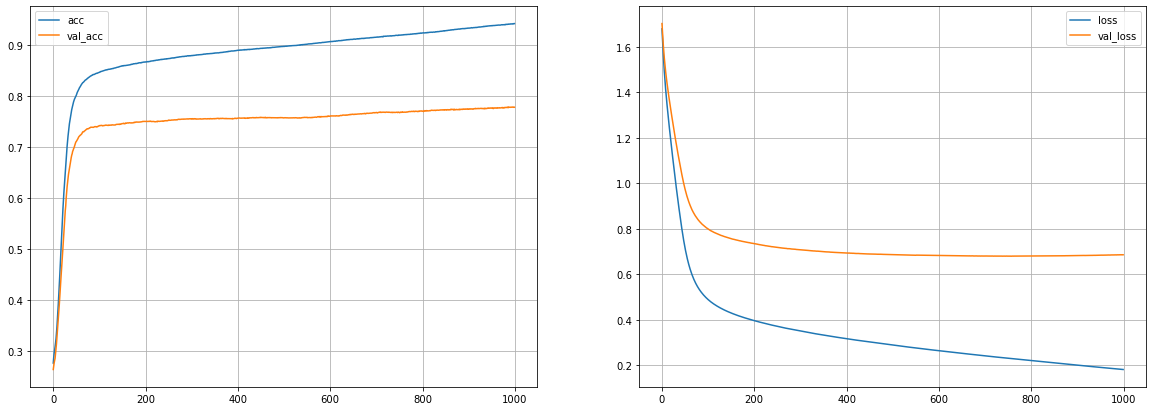

In [116]:
H = history.history

fig = plt.figure(figsize = (20, 7))

plt.subplot(121)
plt.plot(H['accuracy'], label = 'acc')
plt.plot(H['val_accuracy'], label = 'val_acc')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(H['loss'], label = 'loss')
plt.plot(H['val_loss'], label = 'val_loss')
plt.grid()
plt.legend()

In [117]:
seogang_class = [
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 
    3.0, 3.0, 3.0, 3.0, 
    2.0, 2.0, 2.0, 2.0, 2.0, 2.0
]
seogang_class = tf.keras.utils.to_categorical(seogang_class)

seogang_major = pd.read_csv('tt.csv').values

test_loss, test_acc = model.evaluate(seogang_major, seogang_class, verbose=2)

1/1 - 0s - loss: 0.9788 - accuracy: 0.7742 - 20ms/epoch - 20ms/step
